   Problem Statement:
==============================================================================================================

--------------------------------------------------------------------------------------------------------------
About Company:
--------------------------------------------------------------------------------------------------------------
BC Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. 
The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

--------------------------------------------------------------------------------------------------------------
Problem:
--------------------------------------------------------------------------------------------------------------
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while 
filling out the online application form. 

These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem identifying the customer segments eligible for 
loan amounts to target these customers specifically. Here they have provided a partial dataset. 
(see data-for-project-1 folder).


# 1. Problem statement

Automation of loan eligibility

# 2. Hypothesis

Somethingggg

# 3. Getting the system ready and loading the data

In [958]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px


df_raw = pd.read_csv('./data/raw_data.csv')
df_test = pd.read_csv('./data/validation.csv')

In [959]:
df_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 4. Understanding the data

In [961]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [962]:
print(f'The data has {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.')

The data has 614 rows and 13 columns.


In [963]:
# The Loan_ID column is not needed so we can remove it
df_raw_new = df_raw.drop(columns = 'Loan_ID')
df_raw_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 5. Exploratory Data Analysis


### Summary Statistics
i. **Univariate analysis**
- Looking at each variable independtly

In [966]:
df_raw_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Charts

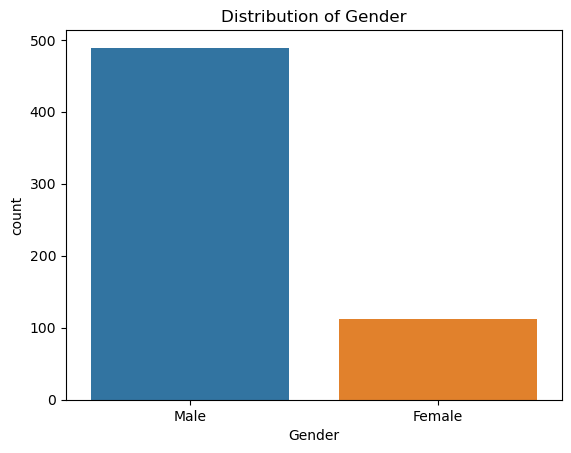

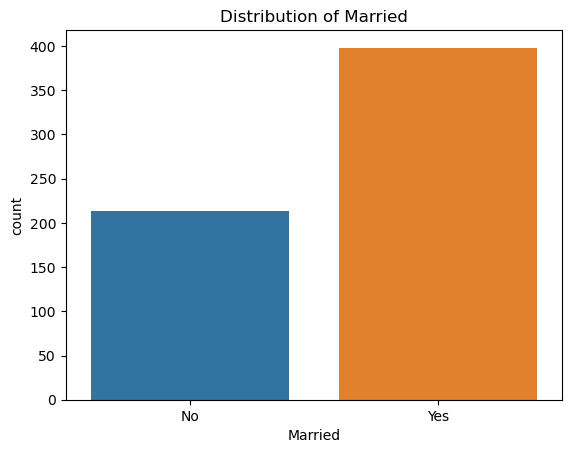

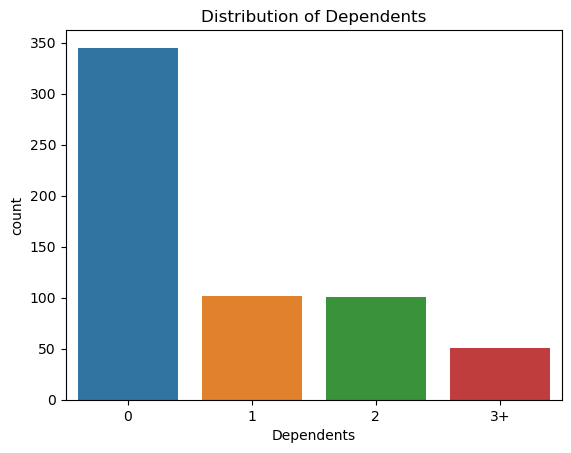

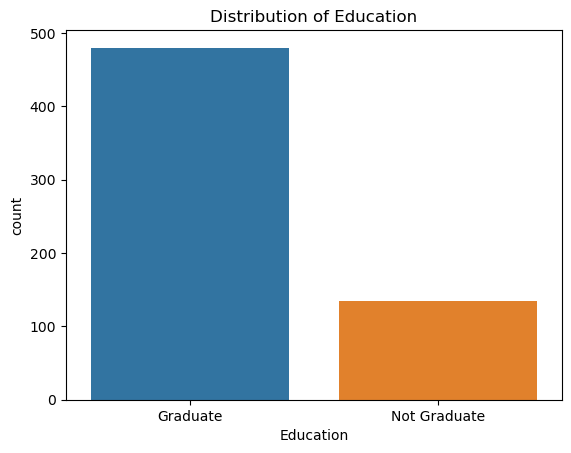

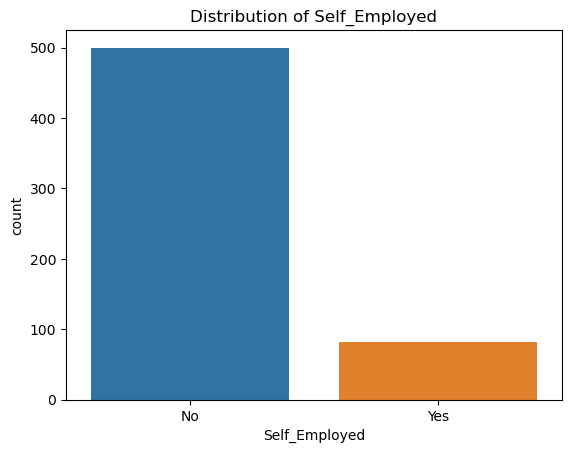

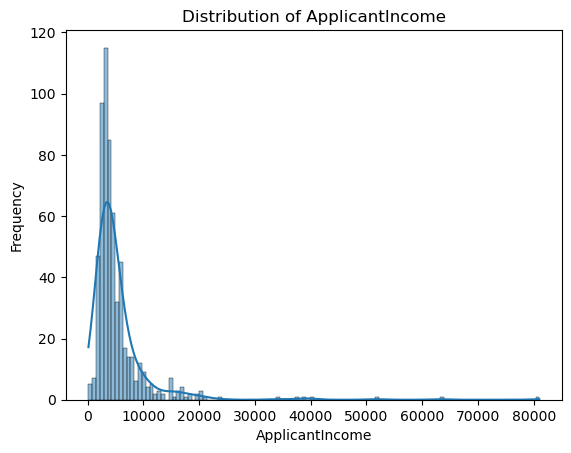

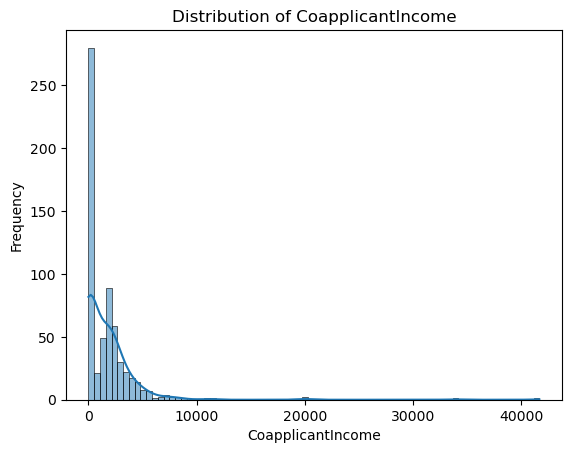

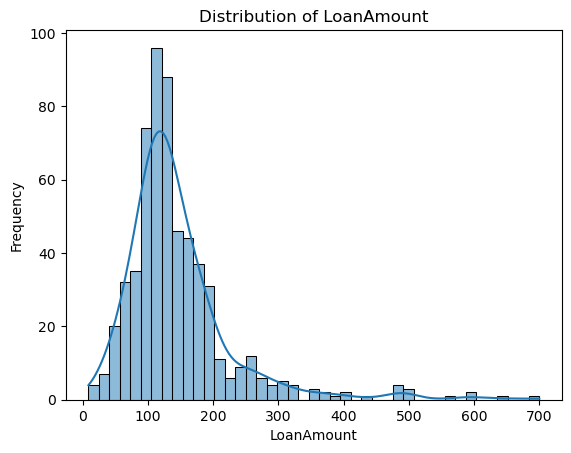

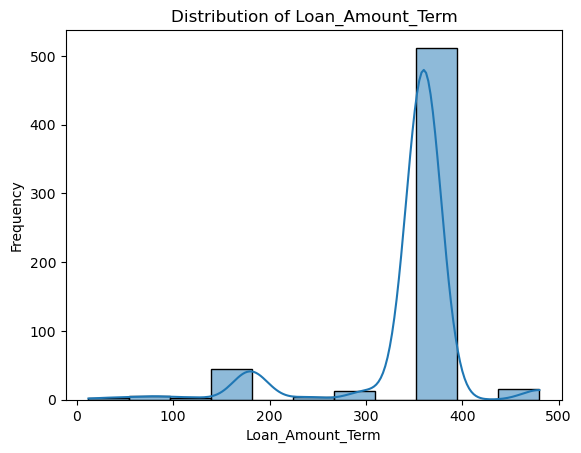

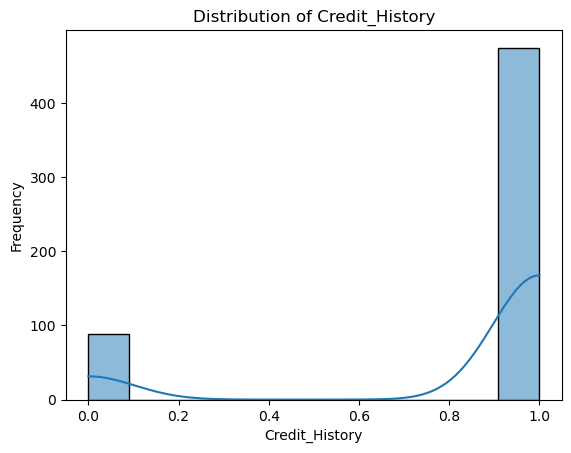

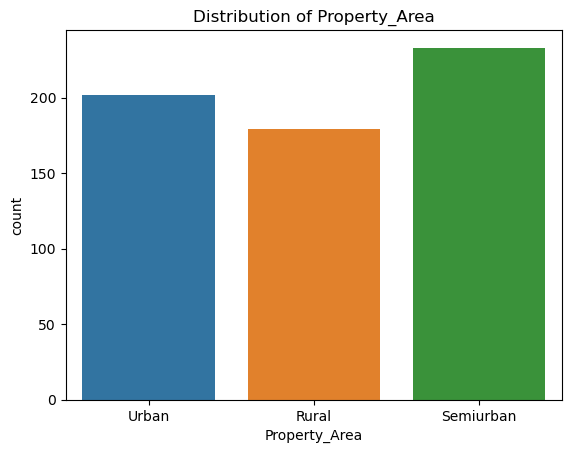

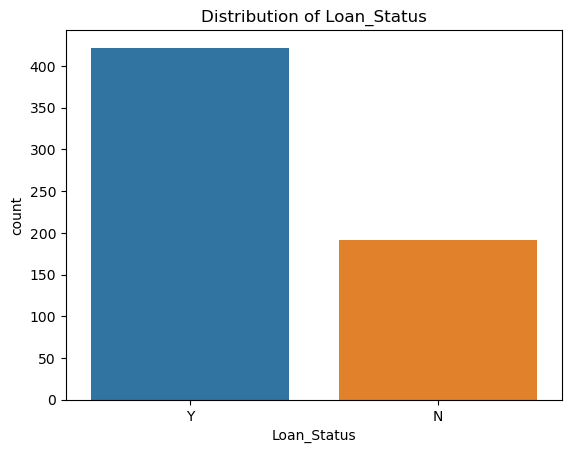

In [968]:
for column in df_raw_new.columns:
    if df_raw_new[column].dtype == 'object':
        # Using a countplot for categorical variables
        sns.countplot(x = column, data = df_raw_new)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        # Using a histogram for numerical variables
        sns.histplot(df_raw_new[column], kde = True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()

ii. **Bivariate analysis**
- Looking at variable relationships

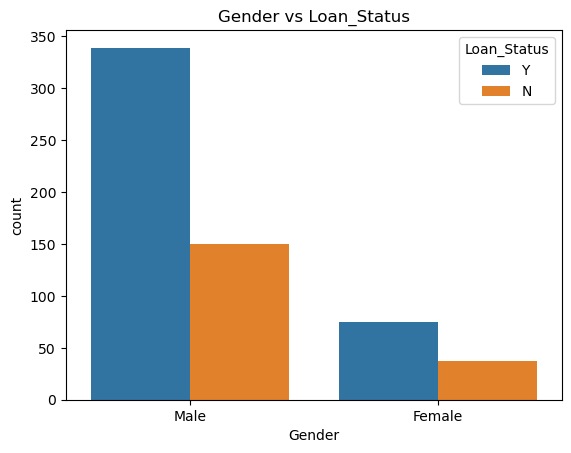

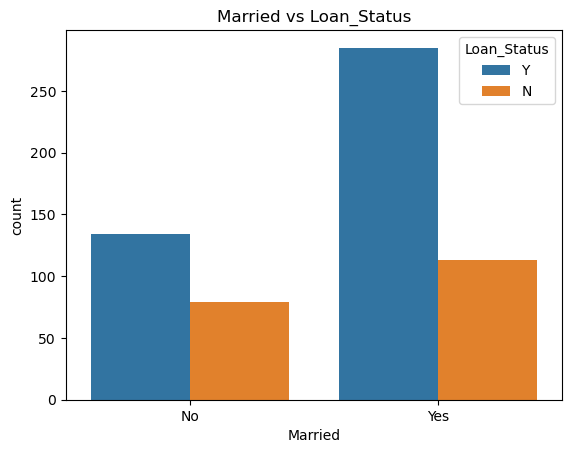

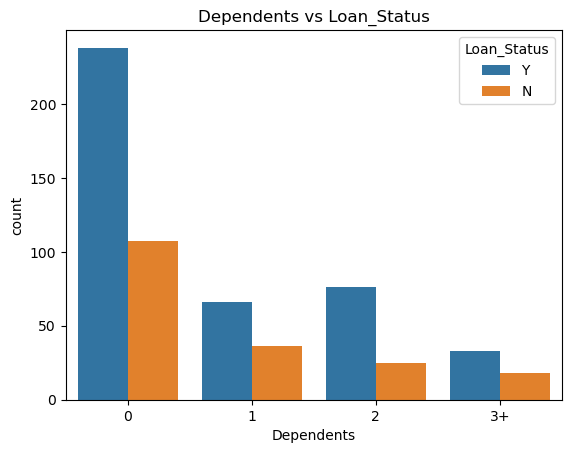

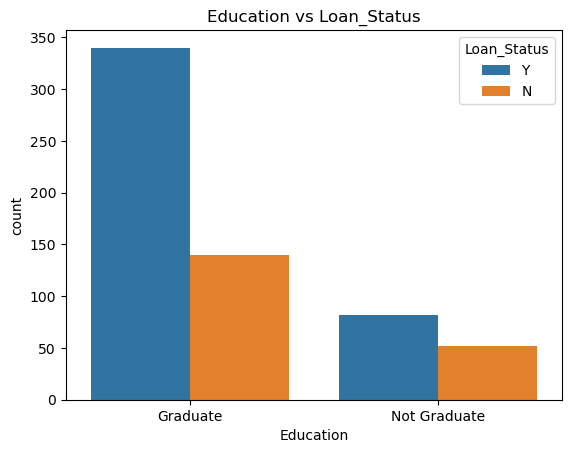

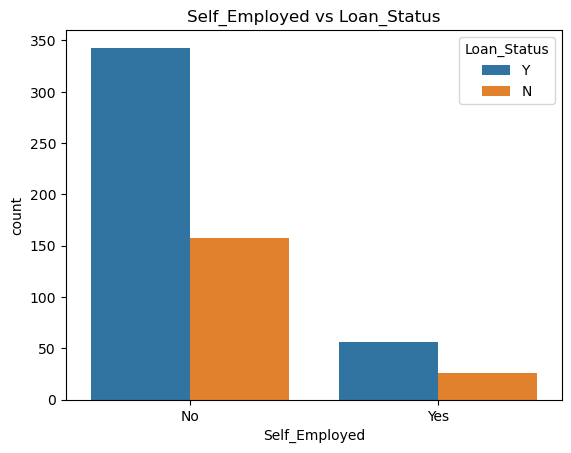

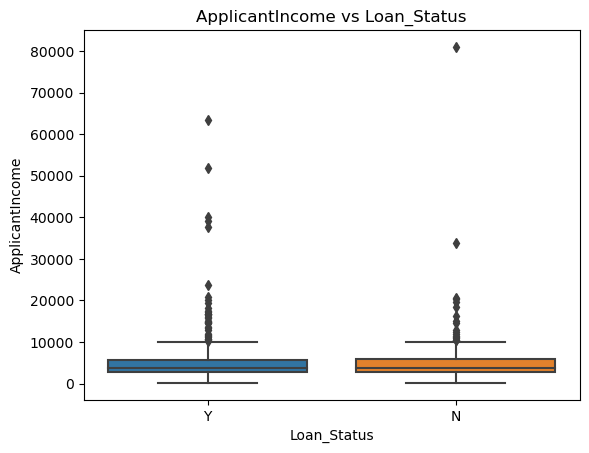

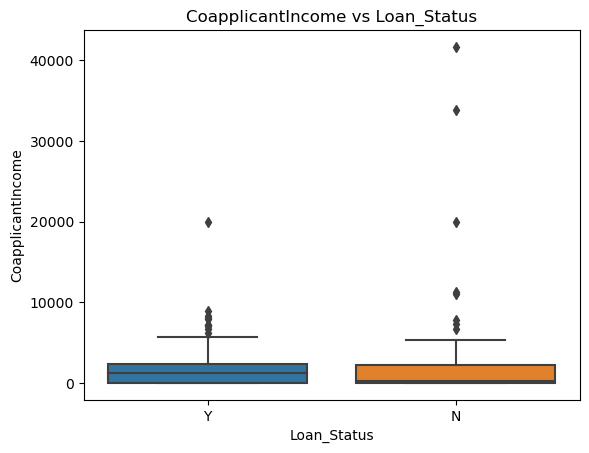

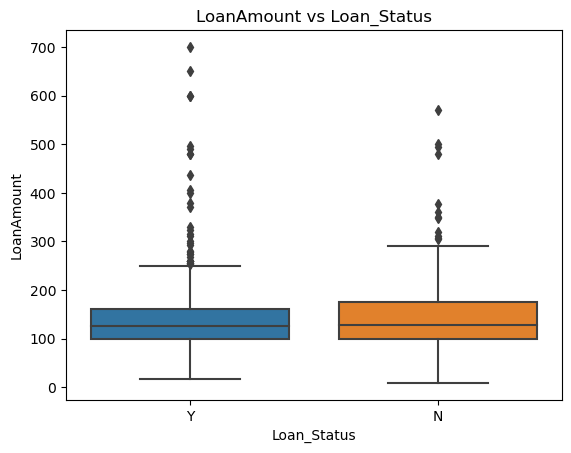

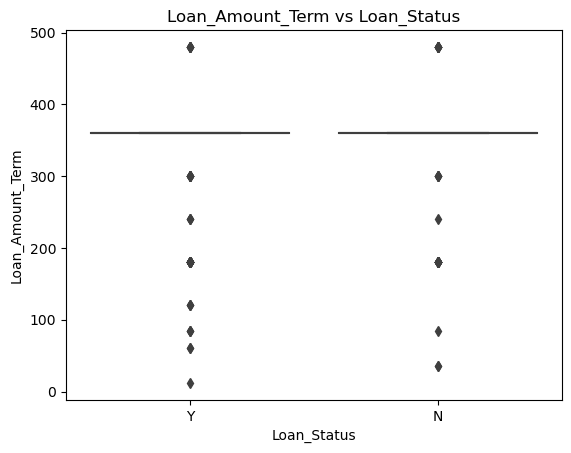

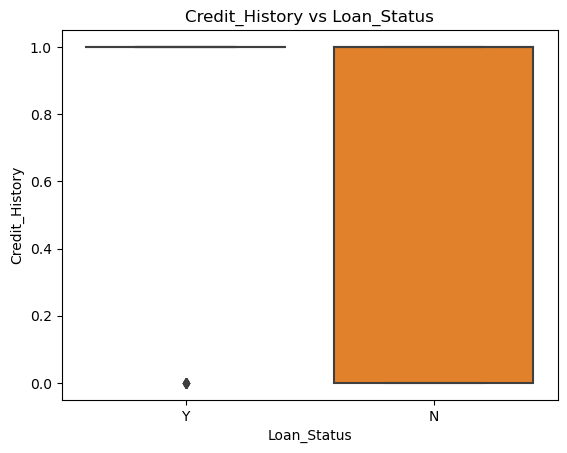

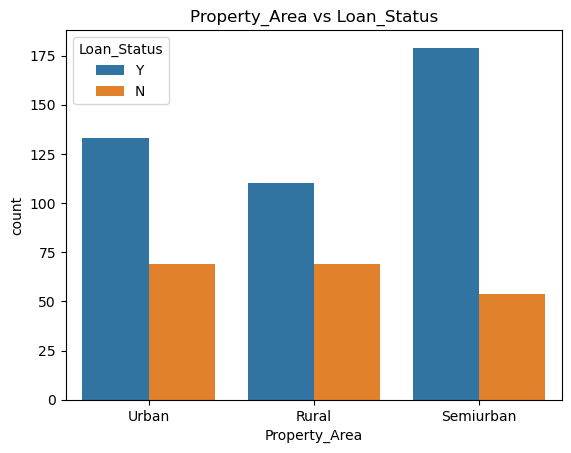

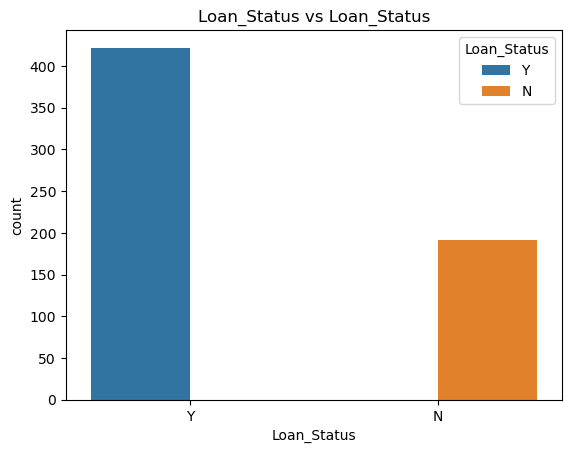

In [970]:
for column in df_raw_new.columns:
    if df_raw_new[column].dtype == 'object':
        # Using a countplot for categorical variables
        sns.countplot(x = column, hue ='Loan_Status', data = df_raw_new)
        plt.title(f'{column} vs Loan_Status')
        plt.show()
    else:
        # Using a boxplot for numerical variables
        sns.boxplot(x ='Loan_Status', y = column, data = df_raw_new)
        plt.title(f'{column} vs Loan_Status')
        plt.show()

### Identify the missing values


In [972]:
missing_values = (
    df_raw_new.isnull().sum()/len(df_raw_new)*100
).round(0).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values.round(2)

Column			% missing
-----------------------------------


Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           4
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

### Replace NaN with values using the mean strategy

In [974]:
for col in df_raw_new.columns:
    if df_raw_new[col].dtype == 'int64' or df_raw_new[col].dtype == 'float64':
        df_raw_new[col].fillna(df_raw_new[col].mean(), inplace=True)
    else:
        df_raw_new[col].fillna(df_raw_new[col].mode(), inplace=True)
df_raw_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Handling outliers

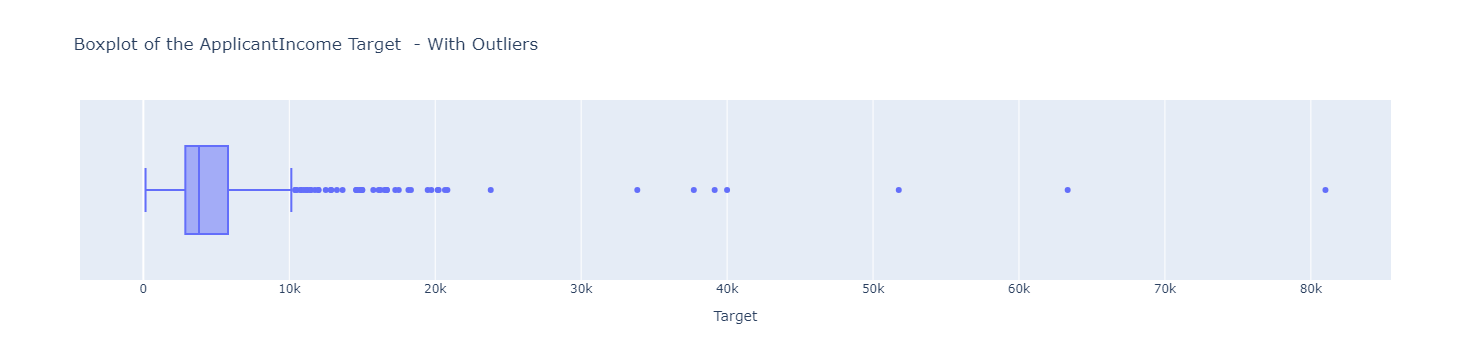

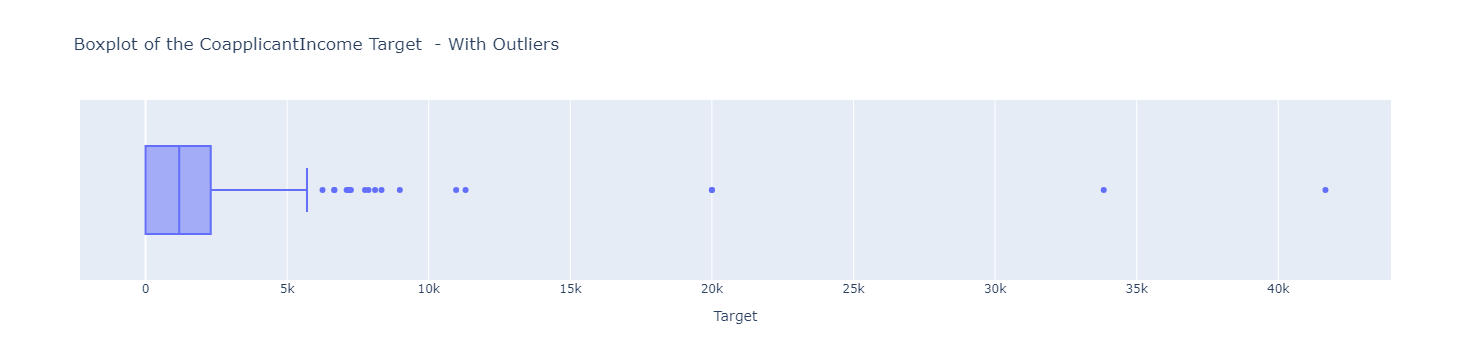

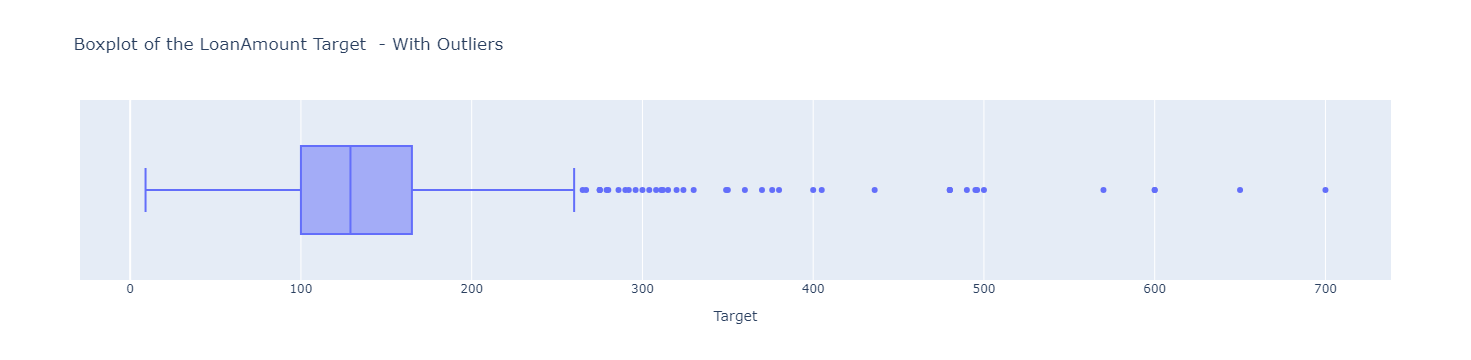

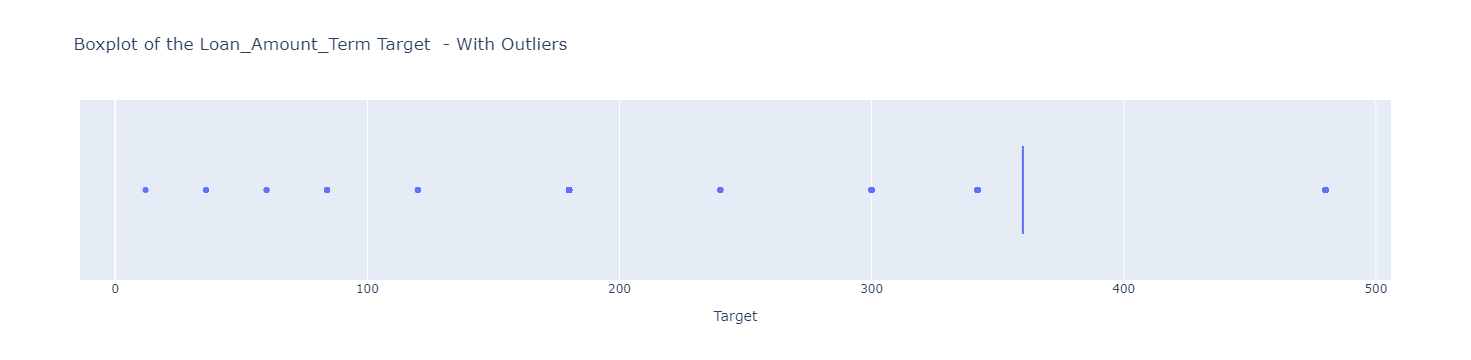

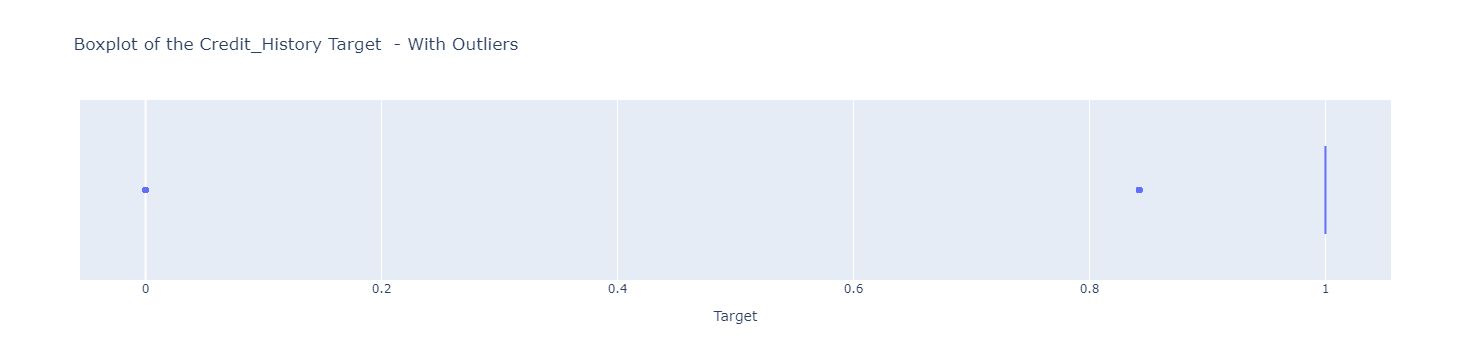

In [976]:
for col in df_raw_new.columns:
    if df_raw_new[col].dtype == 'float64' or df_raw_new[col].dtype == 'int64':
        fig = px.box(
            df_raw_new, 
            x = col, 
            orientation='h',
            title=f'Boxplot of the {col} Target  - With Outliers'
        )
        fig.update_layout(xaxis_title='Target')
        fig.show()

### Removing the outliers

In [984]:
#Removing data from the dataset which doesn't comply to the specified rule
df_raw_new1 = df_raw_new[df_raw_new['ApplicantIncome'] < 10000]
df_raw_new2 = df_raw_new1[df_raw_new1['CoapplicantIncome'] < 5701]
df_raw_new3 = df_raw_new2[df_raw_new2['LoanAmount'] < 260]
df_raw_new3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Data transformation

Transform the 'Y' and 'N' labels of loan status to 1 or 0

In [987]:
df_raw_new3['Loan_Status'] = df_raw_new3['Loan_Status'].apply(lambda s: 1 if s == 'Y' else 0)

C:\Users\werne\AppData\Local\Temp\ipykernel_137604\3670931506.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [988]:
df_raw_new3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [989]:
df_raw_new3 = pd.get_dummies(df_raw_new3, columns=['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

df_raw_new3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,...,Dependents_3+,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,0,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,1,False,True,True,False,...,False,False,True,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,1,False,True,True,False,...,False,False,True,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,1,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False
610,4106,0.0,40.000000,180.0,1.0,1,False,True,False,False,...,True,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.000000,360.0,1.0,1,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
612,7583,0.0,187.000000,360.0,1.0,1,False,True,False,False,...,False,False,True,True,False,True,False,False,False,True


In [990]:
# Encode all categorical data to 0 or 1 for logistic regression
for col in ss_scaled_df.columns:
    if df_raw_new3[col].dtype == 'bool':
        df_raw_new3[col] = df_raw_new3[col].apply(lambda x: 1 if x == True else 0)
        
df_raw_new3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,...,Dependents_3+,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,1,0,...,0,0,1,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,1,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1


### Modeling


In [992]:
X = df_raw_new3.drop(['Loan_Status'], axis=1) 
Y = df_raw_new3['Loan_Status']

In [993]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [994]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [995]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [997]:
y_pred = model.predict(X_test_scaled)

In [998]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [999]:
print(f"Accuracy: {accuracy:.4f}")
print()
print(f"Classification Report:\n{report}")

Accuracy: 0.8176

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.47      0.61        49
           1       0.80      0.97      0.88       110

    accuracy                           0.82       159
   macro avg       0.84      0.72      0.75       159
weighted avg       0.83      0.82      0.80       159

